In [10]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import rasterio as rio
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
# plotting functions


### Opening raster and extracting np.array

def get_array(path):

    rast = rio.open(path)
    image = rast.read()
    rast.close()
    
    return image


### looking at mine across all PC bands
def pc_plotter(array,color,pc):
    # array must be a 3-D array of dim [2,:,:]
    # color must be a string of accepted seaborn cmap colors 'gray', 'turbo', 'seismic', etc.
    # must be integer 1-3 to call which PC to plot, or string 'all' for PC1-3 plots.
    
    if pc == 'all':
        # Heatmap of PC-1
        sns.heatmap(array[0,:,:], cmap = color)
        plt.title('PC-1', fontsize = 20)
        plt.show()

        # Heatmap of PC-2
        sns.heatmap(array[1,:,:], cmap = color)
        plt.title('PC-2', fontsize = 20)
        plt.show()

        # Heatmap of PC-3
        sns.heatmap(array[2,:,:], cmap = color)
        plt.title('PC-3', fontsize = 20)
        plt.show()
        
    else:
        sns.heatmap(array[int(pc-1),:,:], cmap = color)
        plt.title('PC'+ str(pc), fontsize = 20)
        plt.show()
        

        
# float 64 type
TM_pca = get_array('/home/jose/Github/my_projs/abm_detect/data/pca/PCA_HS.tif')  #laptop path


In [114]:
# seperating r,g,b image into individual grayscale for kmeans
TM_pca.shape

red = TM_pca[0,:,:]
green = TM_pca[1,:,:]
blue = TM_pca[2,:,:]


In [ ]:
def kmeans_compress(rgb_array):
    export_arr = np.zeros([rgb_array.shape[0],rgb_array.shape[1],rgb_array.shape[2]])
    
    def kmeans_(grayscale):
        #https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb
        #Read the image
        image = grayscale
        #Dimension of the original image
        rows = image.shape[0]
        cols = image.shape[1]
        #Flatten the image
        image = image.reshape(rows*cols, 1)
        #Implement k-means clustering to form k clusters
        kmeans = KMeans(n_clusters=256)
        kmeans.fit(image)
        #Replace each pixel value with its nearby centroid
        compressed_image = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
        #Reshape the image to original dimension
        compressed_image = compressed_image.reshape(rows, cols, 1)
        compressed_image = compressed_image[:,:,0].reshape([1,rows,cols])
     
        
        return compressed_image

    
    for i in range(0,rgb_array.shape[0]):
        
        
        k_compress = kmeans_(rgb_array[i,:,:])
        #print(k_compress[:,:,0])
        export_arr[i,:,:] = k_compress[0,:,:] # weird.. but because gtiff vs kmeans input and fit X shapes are different
        # also could be the source of error here...
        #print(k_compress.shape)
        #print(rgb_array[i,:,:].shape)
    
    return export_arr
    
stuff = kmeans_compress(TM_pca)
    

(3, 2000, 2000)

<AxesSubplot:>

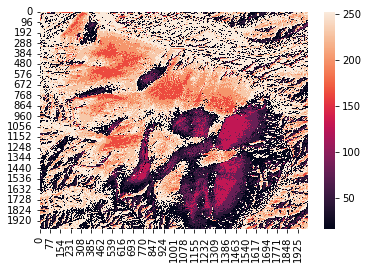

In [178]:
sns.heatmap(stuff[1,:,:])

<AxesSubplot:ylabel='Count'>

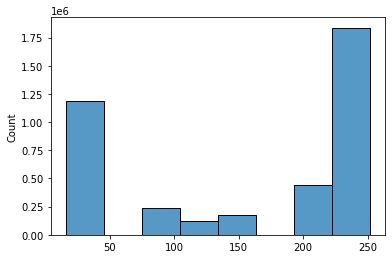

In [183]:
sns.histplot(stuff[1,:,:].flatten(),bins=np.unique(stuff[1,:,:]).shape[0])

In [166]:
#https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb

#Read the image
image = red


#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 1)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 1)



<AxesSubplot:>

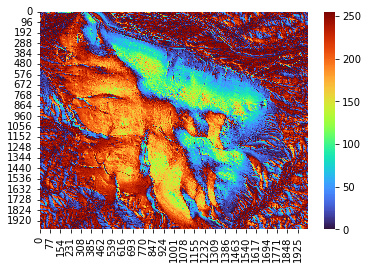

In [105]:
sns.heatmap(compressed_image[:,:,0],cmap='turbo')

<AxesSubplot:>

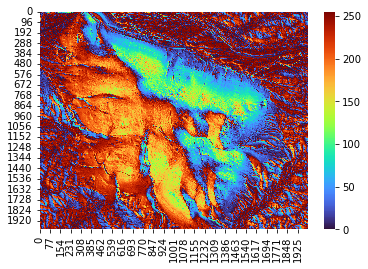

In [107]:
sns.heatmap(compressed_image[:,:,0],cmap='turbo')

In [111]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = compressed_image.reshape(rows, cols, 1)

<AxesSubplot:>

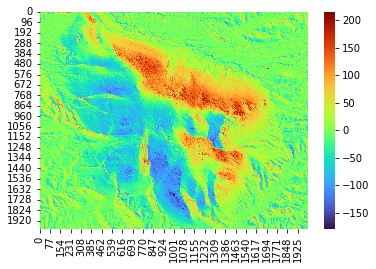

In [112]:
sns.heatmap(compressed_image[:,:,0],cmap='turbo')

In [130]:
compressed_image[:,:,0]

array([[ 17.76636805,  19.32248511,  11.74863338, ...,  10.20916473,
         11.74863338,   9.47078414],
       [ 16.39345681,  12.59519335,  10.20916473, ...,  11.74863338,
         12.59519335,  11.74863338],
       [ 19.32248511,  13.48879222,  10.94254801, ...,  15.08215457,
         20.23593658,  17.76636805],
       ...,
       [-65.58215319, -49.19243419, -38.29146546, ...,   7.82898664,
         13.48879222,  21.26124793],
       [-64.33725634, -50.33470313, -40.53591737, ...,  10.20916473,
         20.23593658,  24.52276021],
       [-61.95534629, -48.0842094 , -42.86117943, ...,  11.74863338,
         19.32248511,  17.07063337]])

In [131]:
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 1)

(2000, 2000)

(1, 2000, 2000)